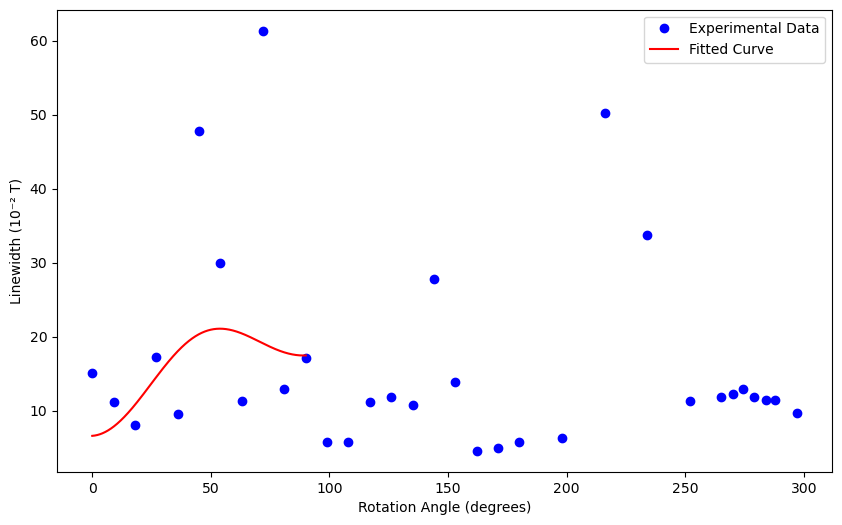

Fitted parameters:
A = -3.622430686995248 × 10⁻² T
φ = -0.015773935500892473 rad
B = 21.079308504489386 × 10⁻² T


<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given linewidth values (multiplied by 100 to show in 10^-2 T)
linewidths = np.array([0.1515, 0.1120, 0.0803, 0.1722, 0.0951, 0.4774, 0.3000, 0.1137, 0.6134, 0.1291, 0.1712, 0.0580, 0.0577, 0.1111, 0.1190, 0.1072, 0.2783,
                      0.1386, 0.0459, 0.0502, 0.0578, 0.0632, 0.5029, 0.3378, 0.1134, 0.1186, 0.1230, 0.1292, 0.1186, 0.1143, 0.1139, 0.0963]) * 100
# Corresponding angles in degrees
angles_deg = np.array([0,9,18,27,36,45,54,63,72,81,90,99,108,117,126,135,144,153,162,171,180,198,216,234,252,265,270,274.5,279,284,288,297])
# Convert angles to radians
angles_rad = np.deg2rad(angles_deg)

# Define the fitting function
def fit_function(theta, A, phi, B):
    return A * (3 * np.cos(theta - phi)**2 - 1)**2 + B

# Perform the curve fitting
initial_guess = [1, 0, 0.5]  # Initial guess for A, phi, B
params, covariance = curve_fit(fit_function, angles_rad, linewidths, p0=initial_guess)

# Extract the fitted parameters
A_fit, phi_fit, B_fit = params

# Generate fitted linewidths for plotting
theta_continuous = np.linspace(0, np.pi/2, 1000)
fitted_linewidths = fit_function(theta_continuous, A_fit, phi_fit, B_fit)

# Plot the data and the fit
plt.figure(figsize=(10, 6))
plt.plot(angles_deg, linewidths, 'bo', label='Experimental Data')
plt.plot(np.rad2deg(theta_continuous), fitted_linewidths, 'r-', label='Fitted Curve')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Linewidth (10\u207b\u00b2 T)')
#plt.title('Linewidth vs. Rotation Angle with Fitted Curve')
plt.legend()
plt.show()

# Print the fitted parameters
print("Fitted parameters:")
print("A = " + str(A_fit) + " \u00d7 10\u207b\u00b2 T")
print("\u03c6 = " + str(phi_fit) + " rad")
print("B = " + str(B_fit) + " \u00d7 10\u207b\u00b2 T")
plt.savefig("YMnS Linewidth Parameter Plot.png")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
angles_deg = np.array([0, 18, 27, 36, 45, 54, 63, 72, 81, 90])
g_values = np.array([2.0057, 2.0058, 2.0016, 2.0056, 2.0017, 2.0061, 2.0002, 2.0058, 2.0005, 2.0043])
angles_rad = np.deg2rad(angles_deg)

# Define fitting function
def fit_function(theta, A, phi, B):
    return A * (3 * np.cos(theta - phi)**2 - 1) + B

# Perform the curve fitting
initial_guess = [0.001, 0, 2.003]
params, covariance = curve_fit(fit_function, angles_rad, g_values, p0=initial_guess)
A_fit, phi_fit, B_fit = params

# Generate smooth curve for plotting
theta_continuous = np.linspace(0, np.pi/2, 1000)
fitted_g_values = fit_function(theta_continuous, A_fit, phi_fit, B_fit)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(angles_deg, g_values, 'bo', markersize=8, label='Experimental Data')
plt.plot(np.rad2deg(theta_continuous), fitted_g_values, 'r-', label='Fitted Curve')

plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('g-value')
plt.title('g-value vs. Rotation Angle with Fit')
plt.legend()
plt.ylim(1.999, 2.007)

plt.tight_layout()
plt.show()

# Print the fitted parameters and R-squared
print("Fitted parameters:")
print("A = " + str(A_fit))
print("φ = " + str(phi_fit) + " rad")
print("B = " + str(B_fit))
print("R-squared = " + str(r_squared))
plt.savefig("YMnS g-value Parameter Plot.png")